In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

Define the VGG19 model:

In [55]:
def VGG19(input_shape=(224, 224, 3)):
    # Input layer
    inputs = Input(shape=input_shape)

    # Hidden Layer 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Hidden Layer 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Hidden Layer 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Hidden Layer 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Hidden Layer 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Fully connected layers
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)

    # Output layer
    outputs = Dense(5, activation='softmax', name='predictions')(x)

    # Create the model
    model = Model(inputs, outputs, name='vgg19')

    return model

# Initialize
model = VGG19()
# model.summary()

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
train_data_dir = '/content/drive/MyDrive/Dataset/CelebrityImages'

# Create the ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    shear_range=0.2,           # Randomly apply shearing transformations
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    validation_split=0.2       # Set aside 20% of the data for validation
)

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),    # Resize all images to 224x224
    batch_size=32,             # Number of images to yield from the generator per batch
    class_mode='categorical',  # Use categorical labels
    subset='training',          # Use the training subset
    shuffle=True
)

# Create the validation generator
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),    # Resize all images to 224x224
    batch_size=16,             # Number of images to yield from the generator per batch
    class_mode='categorical',  # Use categorical labels
    subset='validation',        # Use the validation subset
    shuffle=True
)

Found 217 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


In [58]:
steps_per_epoch = 6 #217/train_generator.batch_size
validation_steps = 3 #52/validation_generator.batch_size

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch if steps_per_epoch > 0 else 1,  # Ensure at least 1 step per epoch
    validation_data=validation_generator,
    validation_steps=validation_steps if validation_steps > 0 else 1,  # Ensure at least 1 step per validation
    epochs=25
)

Epoch 1/25
6/6 [==============================] - 14s 1s/step - loss: 1.6104 - accuracy: 0.1946 - val_loss: 1.6094 - val_accuracy: 0.2083
Epoch 2/25
6/6 [==============================] - 10s 2s/step - loss: 1.6096 - accuracy: 0.1562 - val_loss: 1.6092 - val_accuracy: 0.2292
Epoch 3/25
6/6 [==============================] - 8s 1s/step - loss: 1.6094 - accuracy: 0.1927 - val_loss: 1.6092 - val_accuracy: 0.1875
Epoch 4/25
6/6 [==============================] - 9s 2s/step - loss: 1.6092 - accuracy: 0.1892 - val_loss: 1.6086 - val_accuracy: 0.2708
Epoch 5/25
6/6 [==============================] - 9s 1s/step - loss: 1.6094 - accuracy: 0.1838 - val_loss: 1.6101 - val_accuracy: 0.2083
Epoch 6/25
6/6 [==============================] - 9s 1s/step - loss: 1.6097 - accuracy: 0.2108 - val_loss: 1.6086 - val_accuracy: 0.2292
Epoch 7/25
6/6 [==============================] - 9s 2s/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6102 - val_accuracy: 0.2083
Epoch 8/25
6/6 [=======================

In [59]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

4/4 [==============================] - 2s 306ms/step - loss: 1.5998 - accuracy: 0.2308
Validation Accuracy: 23.08%


1/1 [==============================] - 0s 384ms/step


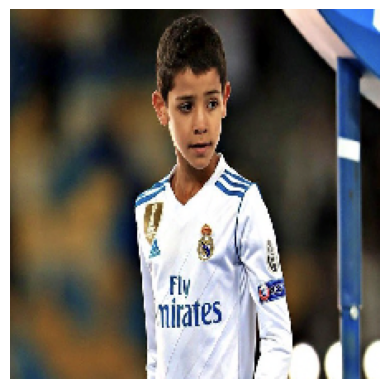

The predicted class/label is: ronaldo


In [63]:
# Prediction
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

img_path = '/content/drive/MyDrive/Dataset/Validation/sample_image.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)

class_labels = ['maria_sharapova', 'messi', 'ronaldo', 'shahrukh_khan', 'virat_kohli']

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

predicted_class_label = class_labels[predicted_class_index[0]]
print(f"The predicted class/label is: {predicted_class_label}")